# FEATURE CONTROL

Цель: Определить влияние признаков на качество работы модели

# 1. Импорт библиотек

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir('..')
from src.utils.paths import RAW_DATA_DIR

# 2. Загрузка CSV-файла

In [8]:
df = pd.read_csv(RAW_DATA_DIR / 'data.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 3. Создание признаков

In [9]:
df['log_charges'] = np.log1p(df['charges'])
df['charges_per_bmi'] = df['charges'] / df['bmi']
print(df['log_charges'].head())
print(df['charges_per_bmi'].head())

0    9.734236
1    7.453882
2    8.400763
3    9.998137
4    8.260455
Name: log_charges, dtype: float64
0    605.194409
1     51.097196
2    134.832182
3    968.265607
4    133.893878
Name: charges_per_bmi, dtype: float64


# 4. Проверка полезности

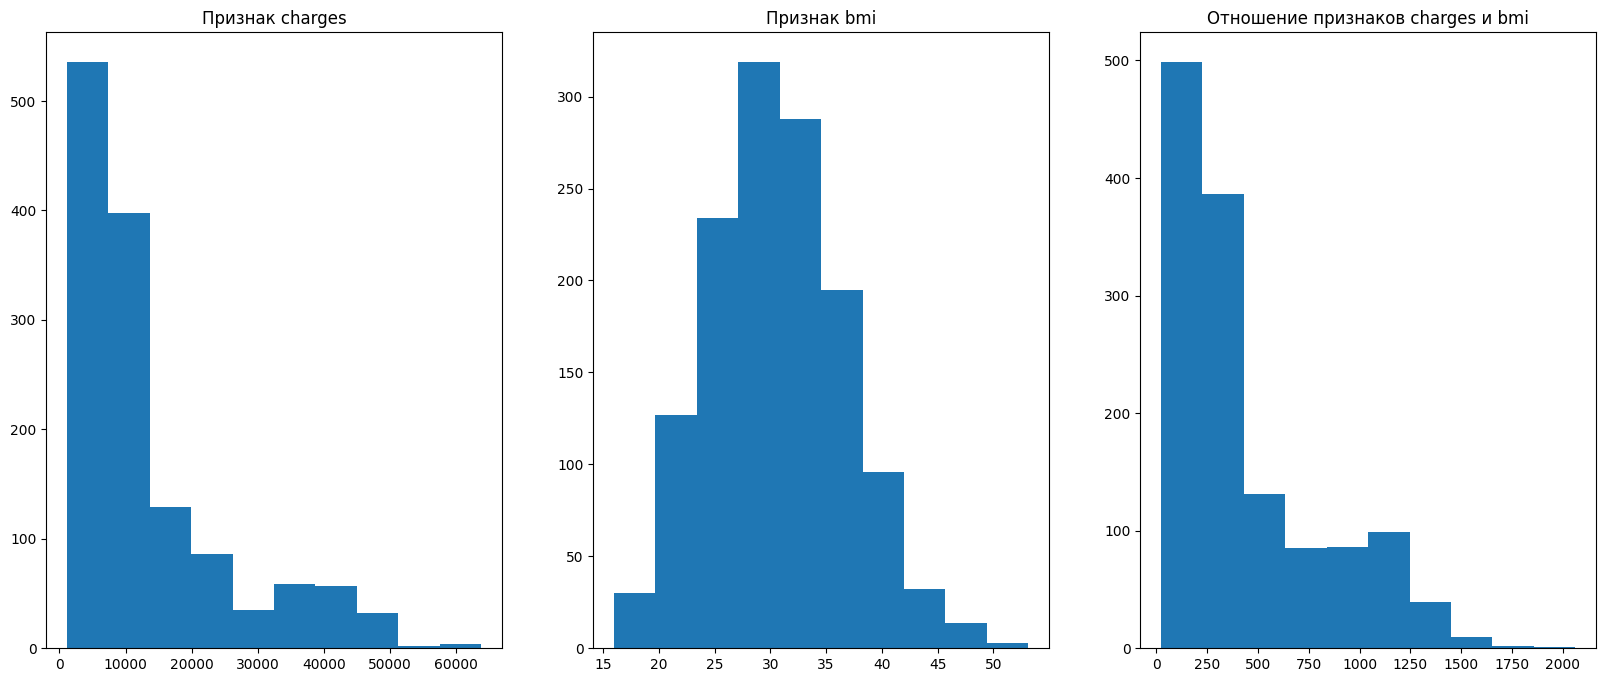

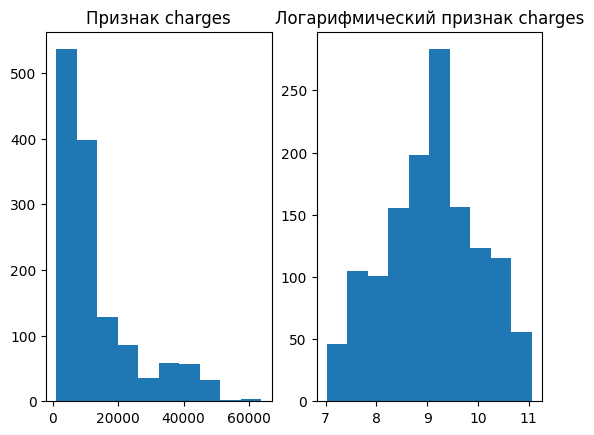

,charges,log_charges,charges_per_bmi
charges,1.000000,0.892996,0.959552
log_charges,0.892996,1.000000,0.898436
charges_per_bmi,0.959552,0.898436,1.000000


In [30]:
# Отношение признаков charges и bmi
fig, ax = plt.subplots(1, 3, figsize=(20, 8))

ax[0].hist(df['charges'])
ax[0].set_title('Признак charges')

ax[1].hist(df['bmi'])
ax[1].set_title('Признак bmi')


ax[2].hist(df['charges_per_bmi'])
ax[2].set_title('Отношение признаков charges и bmi')

plt.show()

fig2, ax2 = plt.subplots(1, 2)

ax2[0].hist(df['charges'])
ax2[0].set_title('Признак charges')

ax2[1].hist(df['log_charges'])
ax2[1].set_title('Логарифмический признак charges')

plt.show()

# Корреляция
df[['charges', 'log_charges', 'charges_per_bmi']].corr()

# 5. Выводы

- исходный признак имел асимметричное распределение
- при создании логарифмического признака, распределение значений улучшилось
- признаки коррелируют (связь между признаками есть)
- признак charges_per_bmi убираем, так как признак не улучшил распределение